In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [2]:
# Define Constants 
k = 1000
r = 0.3

# Definitions for predator prey models
a = 0.3
f = 0.5
q = 0.1

In [3]:
def exponential_model(N, t):
    dNdt = r * N
    return dNdt


def sigmoid_model(N, t):
    dNdt = r * N * ((k-N)/k)
    return dNdt

def predator_prey_models(z, t):
    # z will hold the predator and prey populations 
    # z[0] will be prey (i.e N ), and z[1] will be predator (i.e P)
    N = z[0]
    P = z[1]

    # models 
    dNdt = r * N - a * N * P
    dPdt = f * a * N * P - q * P

    return [dNdt, dPdt]


def env_sensitive_predator_prey_model(z, t, x):
    # z will hold population
    # x will hold temperature sensitivity vals
    N = z[0]; P = z[1]
    

    nx = x[0]; px = x[1]
    

    # temperature sensitive functions
    r1 = r * math.exp(- math.pow(nx, 4))
    f1 = f * math.exp(- math.pow(px,4))
    q1 = q * (2 - math.exp(- math.pow(px, 4)))

    # models
    dNdt = r1 * N - a * N * P
    dPdt = f1 * a * N * P - q1 * P

    return [dNdt, dPdt]

def getConsumption(z):
    c = 0.5 # consumption rate of prey on crop
    Ns = z[:,0].tolist()
    Ns = [c*N for N in Ns]
    return np.sum(Ns)

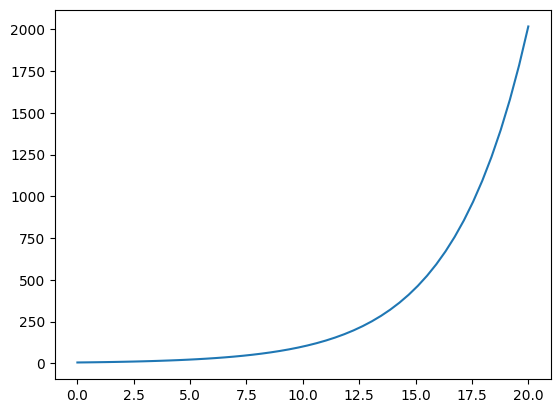

In [41]:
# exponential model

N0 = 5

t = np.linspace(0,20)

N = odeint(exponential_model, N0, t)

plt.plot(t, N)

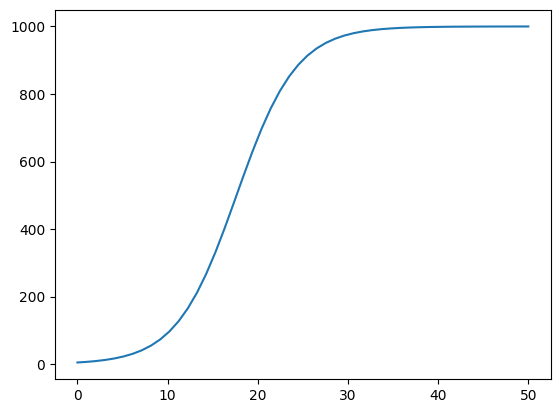

In [42]:
# sigmoidal model

N0 = 5


t = np.linspace(0,50)

N = odeint(sigmoid_model, N0, t)

plt.plot(t, N)

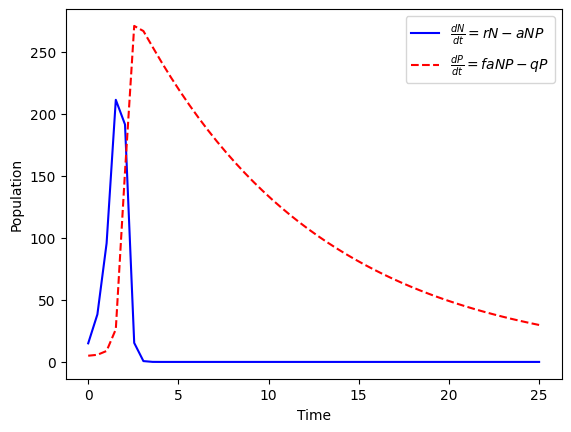

In [105]:
# predator prey model constants

r = 2
a = 0.03
f = 0.5
q = 0.1


# initial condition
z0 = [15,5]

# time points
t = np.linspace(0,25)

# solve ODE
z = odeint(predator_prey_models,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dN}{dt}= rN - aNP$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dP}{dt}= faNP - qP$')
plt.ylabel('Population')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

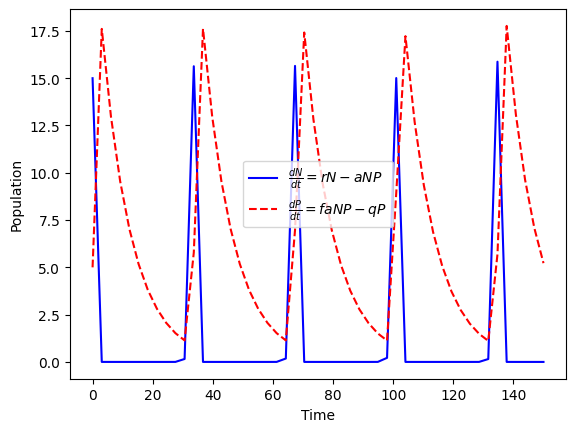

In [80]:
# predator prey model constants

r = 2
a = 0.3
f = 0.5
q = 0.1

# initial condition
z0 = [15,4]

# time points
t = np.linspace(0,150)

# solve ODE
x=0
z1 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

# plot results
plt.plot(t,z1[:,0],'b-',label=r'$\frac{dN}{dt}= rN - aNP$')
plt.plot(t,z1[:,1],'r--',label=r'$\frac{dP}{dt}= faNP - qP$')
plt.ylabel('Population')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

In [5]:
# predator prey model constants

r = 2
a = 0.3
f = 0.5
q = 0.1

# initial condition
z0 = [15,5]

# time points
t = np.linspace(0,100)

# solve ODE
x=[0,0]
z1 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

#x=[0,0.5]
#z2 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

#x=[0,0.75]
#z3 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

x=[0, 1]
z4 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

#x=[0.5,0]
#z5 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

#x=[0.75,0]
#z6 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

x=[1,0]
z7 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

#x=[0.5,0.5]
#z8 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

#x=[0.75,0.75]
#z9 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))

x=[1,1]
z10 = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))


# plot results
#plt.plot(t,z1[:,0],'b-',label=r'$\frac{dN}{dt}= rN - aNP$')
#plt.plot(t,z1[:,1],'r--',label=r'$\frac{dP}{dt}= faNP - qP$')

#plt.plot(t,z2[:,0],'o-',label=r'$\frac{dN}{dt}= rN - aNP$')
#plt.plot(t,z2[:,1],'v--',label=r'$\frac{dP}{dt}= faNP - qP$')


#plt.plot(t,z3[:,0],'o-',label=r'$\frac{dN}{dt}= rN - aNP$')
#plt.plot(t,z3[:,1],'v--',label=r'$\frac{dP}{dt}= faNP - qP$')


#plt.ylabel('Population')
#plt.xlabel('Time')
#plt.legend(loc='best')
#plt.show()

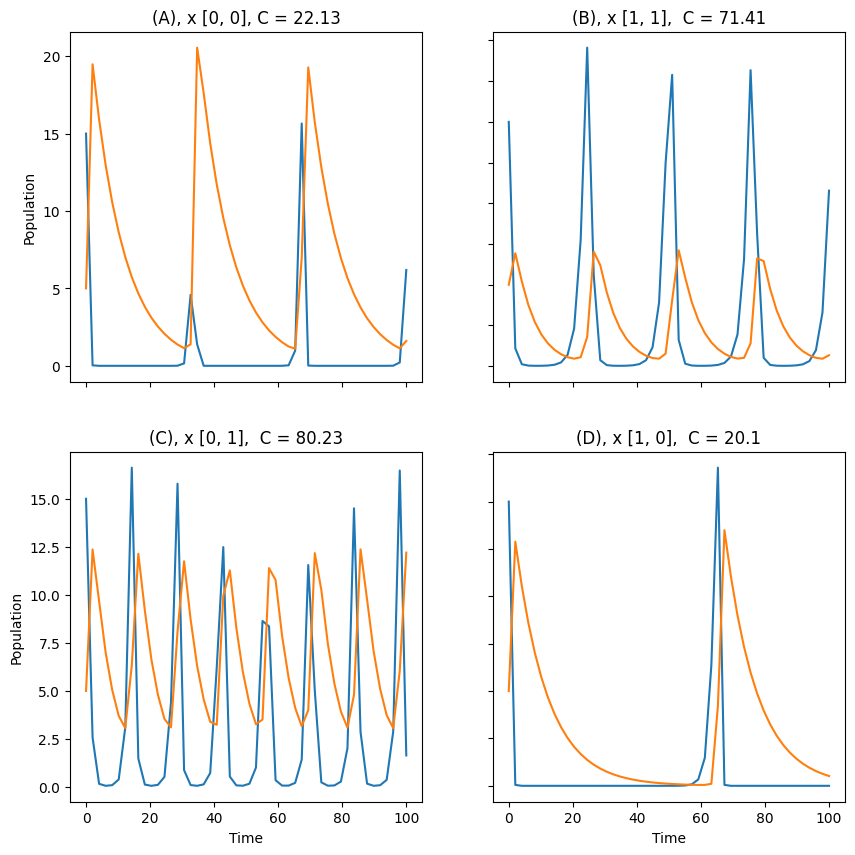

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))


# first layer
axs[0, 0].plot(t, z1)
axs[0, 0].set_title(f'(A), x [0, 0], C = {round(getConsumption(z1),2)}')
axs[0, 1].plot(t, z10)
axs[0, 1].set_title(f'(B), x [1, 1],  C = {round(getConsumption(z10),2)}')

# second layer
axs[1, 0].plot(t, z4)
axs[1, 0].set_title(f'(C), x [0, 1],  C = {round(getConsumption(z4),2)}')
axs[1, 1].plot(t, z7)
axs[1, 1].set_title(f'(D), x [1, 0],  C = {round(getConsumption(z7),2)}')


'''
# first layer
axs[0, 0].plot(t, z2)
axs[0, 0].set_title(f'x [0, 0.5], C = {round(getConsumption(z2),2)}')
axs[0, 1].plot(t, z3)
axs[0, 1].set_title(f'x [0, 0.75],  C = {round(getConsumption(z3),2)}')
axs[0, 2].plot(t, z4)

axs[0, 2].set_title(f'x [0, 1],  C = {round(getConsumption(z4),2)}')

# second layer
axs[1, 0].plot(t, z5)
axs[1, 0].set_title(f'x [0.5, 0],  C = {round(getConsumption(z5),2)}')
axs[1, 1].plot(t, z6)
axs[1, 1].set_title(f'x [0.75, 0],  C = {round(getConsumption(z6),2)}')
axs[1, 2].plot(t, z7)
axs[1, 2].set_title(f'x [1, 0],  C = {round(getConsumption(z7),2)}')

# third layer
axs[2, 0].plot(t, z8)
axs[2, 0].set_title(f'x [0.5, 0.5],  C = {round(getConsumption(z8),2)}')
axs[2, 1].plot(t, z9)
axs[2, 1].set_title(f'x [0.75, 0.75],  C = {round(getConsumption(z9),2)}')
axs[2, 2].plot(t, z10)
axs[2, 2].set_title(f'x [1, 1],  C = {round(getConsumption(z10),2)}')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

'''
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Population')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [177]:
x2 = np.arange(0,1,0.05).tolist()
x1 = [0 for n in range(20)]
x_p = [[x1[i], round(x2[i],2) ] for i in range(20)]
x_n = [[ round(x2[i],2) ,x1[i]] for i in range(20)]

In [179]:
sensitive_predator = []
for x in x_p:
    z_temp = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))
    c_temp = getConsumption(z_temp)
    sensitive_predator.append(c_temp)


In [180]:
sensitive_prey = []
for x in x_n:
    z_temp = odeint(env_sensitive_predator_prey_model,z0,t, args=(x,))
    c_temp = getConsumption(z_temp)
    sensitive_prey.append(c_temp)


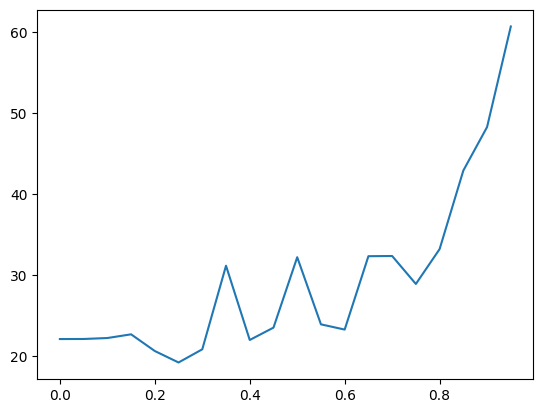

In [181]:
plt.plot(x2, sensitive_predator)

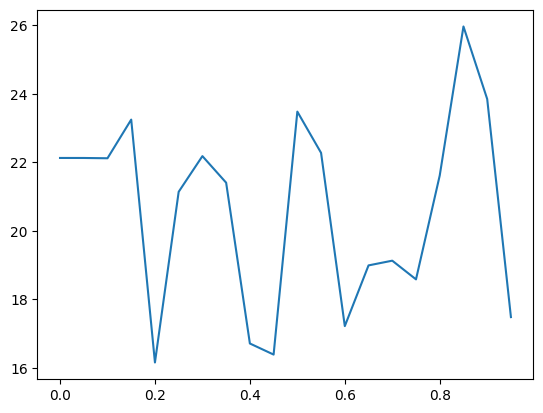

In [182]:
plt.plot(x2, sensitive_prey)